# Plot example model granules for each variable

In [1]:
## import required packages
import numpy as np
import sys
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import warnings
from pathlib import Path
import s3fs
from pprint import pprint
import matplotlib

warnings.filterwarnings('ignore')

In [25]:
var_dir_list = s3.glob(f'ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/*')

In [32]:
for var_dir in var_dir_list[0:2]:
    file_list_winter = s3.glob(f'{var_dir}/*2020-02-01*nc')
    file_list_summer = s3.glob(f'{var_dir}/*2020-08-01*nc')

    url_winter = ['s3://' + file_list_winter[0]]
    url_summer = ['s3://' + file_list_summer[0]]
    print('\nas urls')
    pprint(url_winter)
    pprint(url_summer)

    file_winter = s3.open(url_winter[0])
    file_summer = s3.open(url_summer[0])

    # This works
    data_winter = xr.open_dataset(file_winter)
    data_summer = xr.open_dataset(file_summer)

    field=list(data_winter.keys())
    ds=data[field].THETA.isel(k=20, time=0).load()


as urls
['s3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/ADVr_SLT_AVG_DAILY/ADVr_SLT_day_mean_2020-02-01_ECCO_SASSIE_V1_HH_llc1080.nc']
['s3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/ADVr_SLT_AVG_DAILY/ADVr_SLT_day_mean_2020-08-01_ECCO_SASSIE_V1_HH_llc1080.nc']

as urls
['s3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/ADVr_TH_AVG_DAILY/ADVr_TH_day_mean_2020-02-01_ECCO_SASSIE_V1_HH_llc1080.nc']
['s3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/ADVr_TH_AVG_DAILY/ADVr_TH_day_mean_2020-08-01_ECCO_SASSIE_V1_HH_llc1080.nc']


In [39]:
field=list(data.keys())

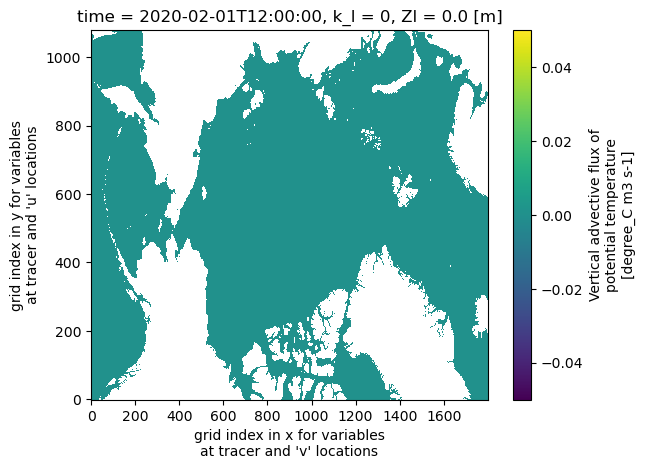

In [47]:
data[field].ADVr_TH.isel(time=0, k_l=0).plot()

In [15]:
s3 = []
s3 = s3fs.S3FileSystem(anon=False)

fields = ['THETA','SALT']
date_select='2020-02-01'
field_urls = {}

## pull dataset from s3 cloud
for field in fields:
    # find filenames for one summer and one winter example
    file_list = s3.glob(f'ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/{field}_AVG_DAILY/*{date_select}*nc')
    # print('\nas s3 paths')
    # pprint(file_list)
    
    # construct url form of filenames
    urls = ['s3://' + f for f in file_list_winter]
    print('\nas urls')
    pprint(urls)
    
    field_urls[field] = urls

    

## open dataset
data = dict()
for field in field_urls:
    # print(field)
    remote_files = field_urls[field]
    
    fileset = [s3.open(file) for file in remote_files]

    # This works
    data[field] = xr.open_mfdataset(fileset, combine='by_coords')


as urls
['s3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/SALT_AVG_DAILY/SALT_day_mean_2020-02-01_ECCO_SASSIE_V1_HH_llc1080.nc']

as urls
['s3://ecco-processed-data/SASSIE/N1/V1/HH/NETCDF/SALT_AVG_DAILY/SALT_day_mean_2020-02-01_ECCO_SASSIE_V1_HH_llc1080.nc']


In [16]:
ds=data['THETA'].THETA.isel(k=20, time=0).load()

AttributeError: 'Dataset' object has no attribute 'THETA'

In [120]:
def plot_ecco_HH_granule_3D(granule_da, depth=0, vmin=None, vmax=None, axs=None, cmap='jet', show_colorbar=True):
    """
    Must input DataArray for variable you want to plot (not Dataset)
    For example: theta_da.THETA
    """
    
    ## make Z a coordinate dimension
    granule_da = granule_da.swap_dims({"k":"Z"})
    
    if vmin == None:
        vmin = np.min(granule_da)
    if vmax == None:
        vmax = np.max(granule_da)

    if axs == None:
        if show_colorbar:
            granule_da.sel(Z=depth, method='nearest').isel(time=0).plot(vmin=vmin, vmax=vmax, cmap=cmap)
        else:
            granule_da.sel(Z=depth, method='nearest').isel(time=0).plot(vmin=vmin, vmax=vmax, cmap=cmap, add_colorbar=False)

    else:
        if show_colorbar:
            granule_da.sel(Z=depth, method='nearest').isel(time=0).plot(vmin=vmin, vmax=vmax, cmap=cmap, ax=axs)
        else:
            granule_da.sel(Z=depth, method='nearest').isel(time=0).plot(ax=axs, vmin=vmin, vmax=vmax, cmap=cmap, add_colorbar=False)
        axs.set_facecolor('lightgray');
            
    fig.tight_layout(w_pad=3)

***

## Z=50 m

### UVEL

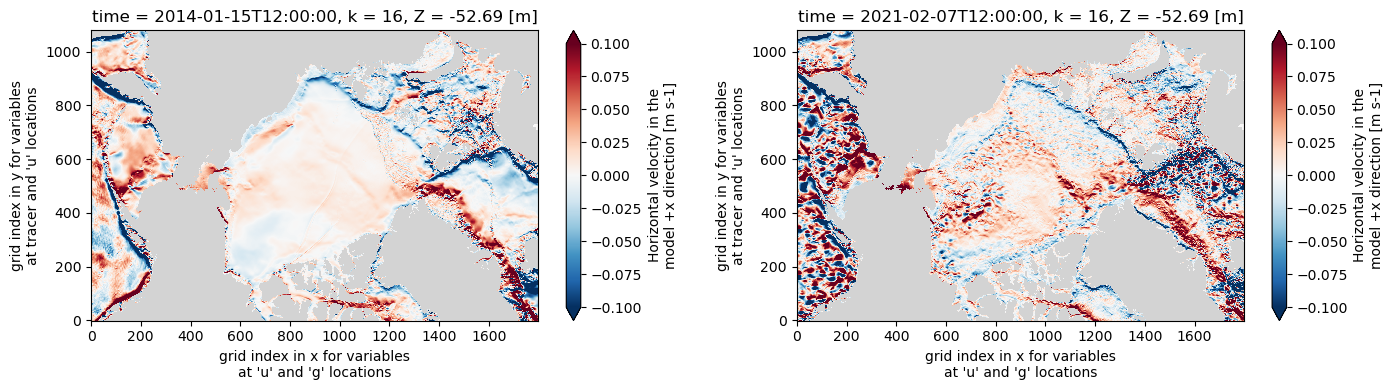

In [122]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=-0.1
vmax=0.1

plot_ecco_HH_granule_3D(uvel_start.UVEL, depth=-50, vmin=vmin, vmax=vmax, axs=ax1, cmap='RdBu_r', show_colorbar=True)
plot_ecco_HH_granule_3D(uvel_end.UVEL, depth=-50, vmin=vmin, vmax=vmax, axs=ax2, cmap='RdBu_r', show_colorbar=True)

### VVEL

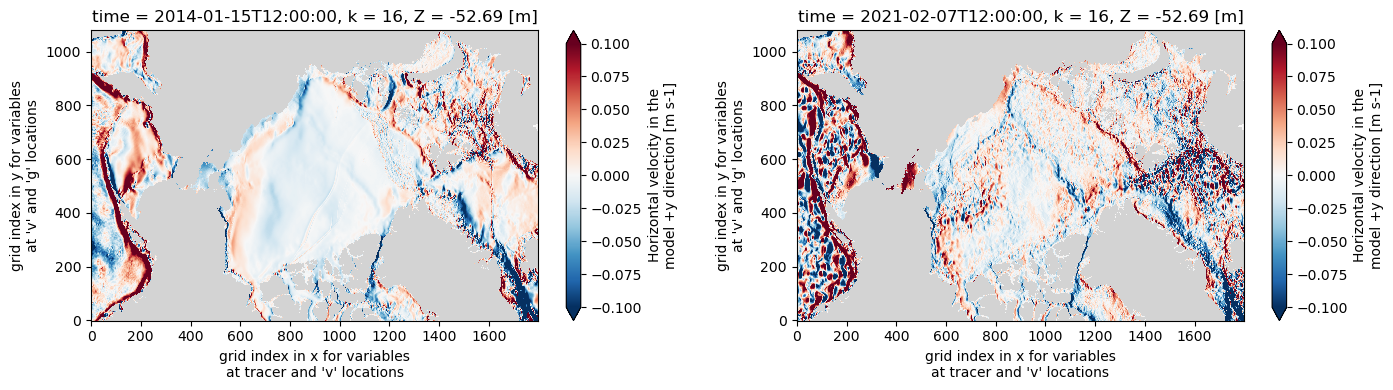

In [124]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=-0.1
vmax=0.1

plot_ecco_HH_granule_3D(vvel_start.VVEL, depth=-50, vmin=vmin, vmax=vmax, axs=ax1, cmap='RdBu_r', show_colorbar=True)
plot_ecco_HH_granule_3D(vvel_end.VVEL, depth=-50, vmin=vmin, vmax=vmax, axs=ax2, cmap='RdBu_r', show_colorbar=True)

### THETA

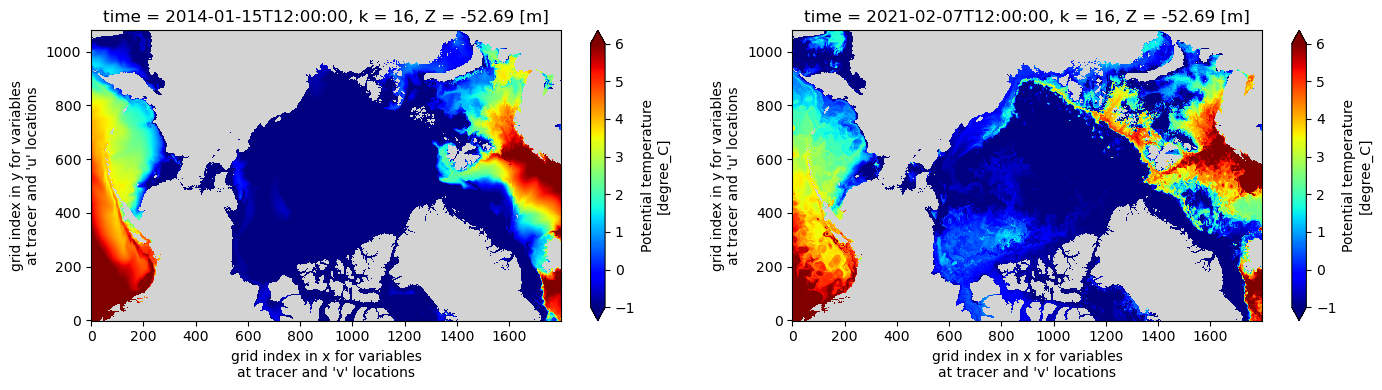

In [128]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=-1
vmax=6

plot_ecco_HH_granule_3D(theta_start.THETA, depth=-50, vmin=vmin, vmax=vmax, axs=ax1, cmap='jet', show_colorbar=True)
plot_ecco_HH_granule_3D(theta_end.THETA, depth=-50, vmin=vmin, vmax=vmax, axs=ax2, cmap='jet', show_colorbar=True)

### SALT

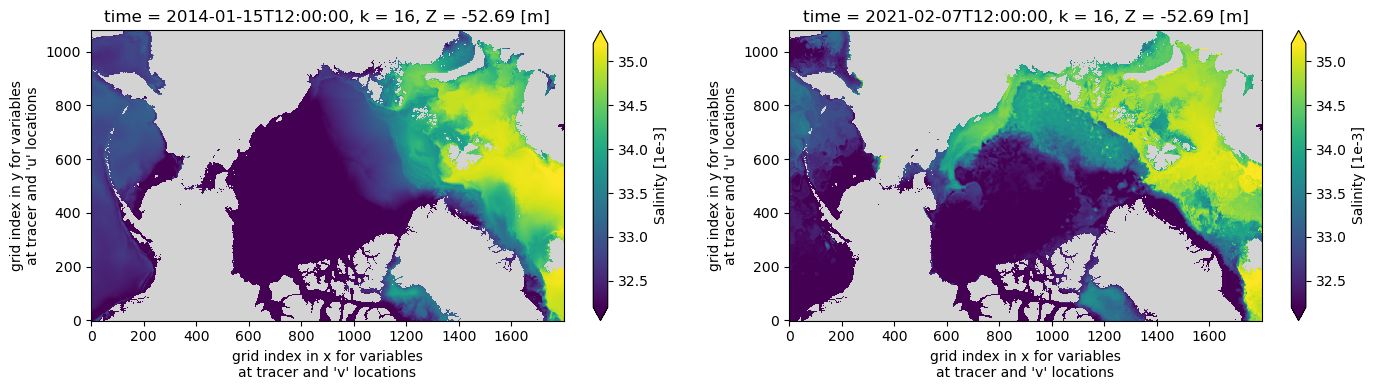

In [158]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=32.2
vmax=35.2

plot_ecco_HH_granule_3D(salt_start.SALT, depth=-50, vmin=vmin, vmax=vmax, axs=ax1, cmap='viridis', show_colorbar=True)
plot_ecco_HH_granule_3D(salt_end.SALT, depth=-50, vmin=vmin, vmax=vmax, axs=ax2, cmap='viridis', show_colorbar=True)

***

## Z=150 m

### UVEL

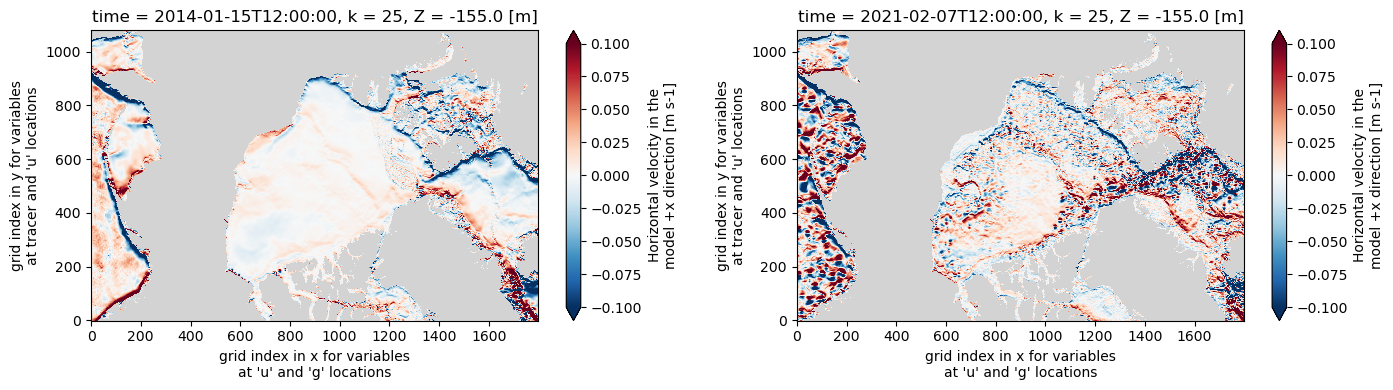

In [140]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=-0.1
vmax=0.1

plot_ecco_HH_granule_3D(uvel_start.UVEL, depth=-150, vmin=vmin, vmax=vmax, axs=ax1, cmap='RdBu_r', show_colorbar=True)
plot_ecco_HH_granule_3D(uvel_end.UVEL, depth=-150, vmin=vmin, vmax=vmax, axs=ax2, cmap='RdBu_r', show_colorbar=True)

### VVEL

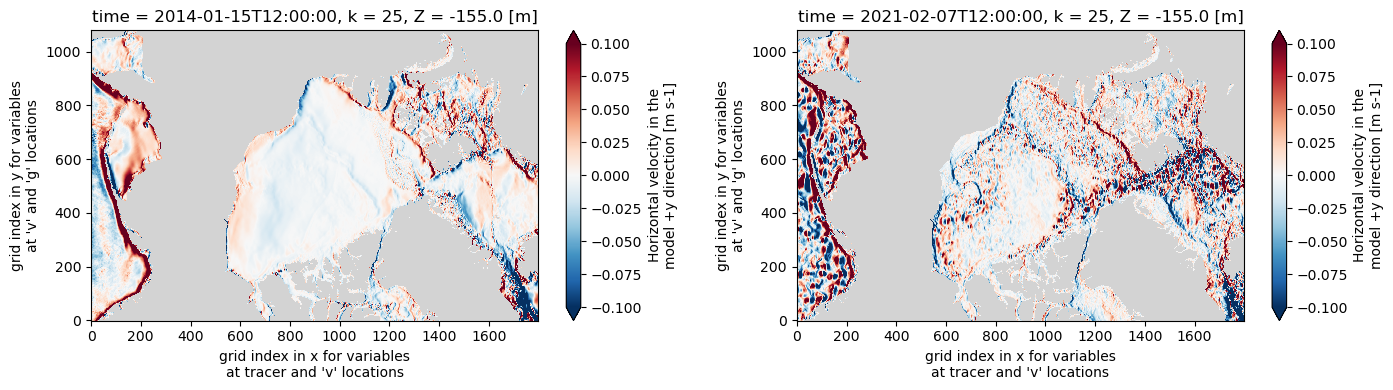

In [143]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=-0.1
vmax=0.1

plot_ecco_HH_granule_3D(vvel_start.VVEL, depth=-150, vmin=vmin, vmax=vmax, axs=ax1, cmap='RdBu_r', show_colorbar=True)
plot_ecco_HH_granule_3D(vvel_end.VVEL, depth=-150, vmin=vmin, vmax=vmax, axs=ax2, cmap='RdBu_r', show_colorbar=True)

### THETA

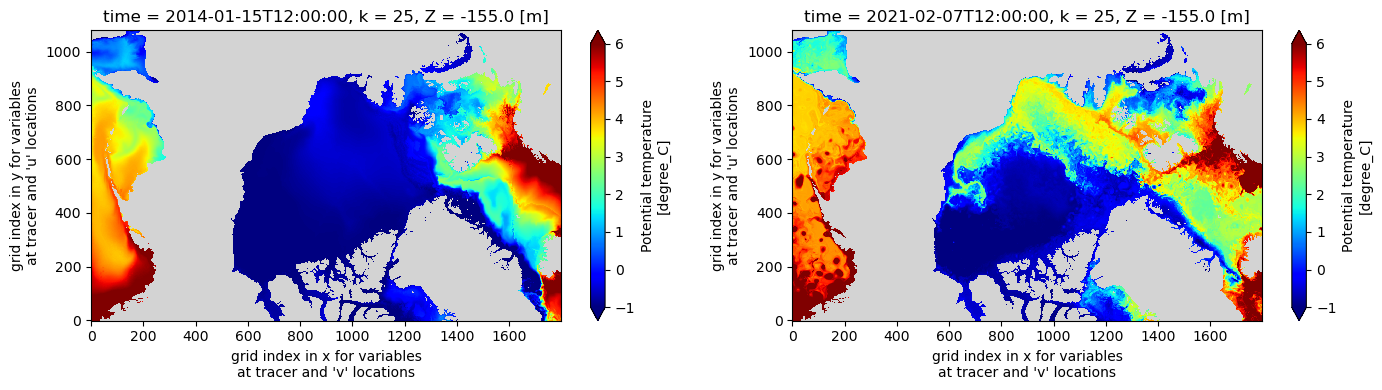

In [145]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=-1
vmax=6

plot_ecco_HH_granule_3D(theta_start.THETA, depth=-150, vmin=vmin, vmax=vmax, axs=ax1, cmap='jet', show_colorbar=True)
plot_ecco_HH_granule_3D(theta_end.THETA, depth=-150, vmin=vmin, vmax=vmax, axs=ax2, cmap='jet', show_colorbar=True)

### SALT

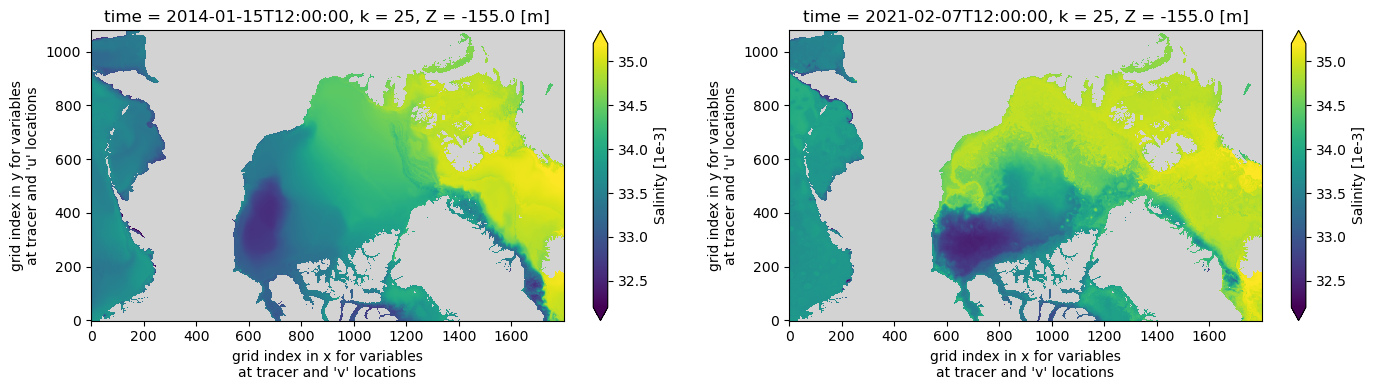

In [156]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[14,4])
vmin=32.2
vmax=35.2

plot_ecco_HH_granule_3D(salt_start.SALT, depth=-150, vmin=vmin, vmax=vmax, axs=ax1, cmap='viridis', show_colorbar=True)
plot_ecco_HH_granule_3D(salt_end.SALT, depth=-150, vmin=vmin, vmax=vmax, axs=ax2, cmap='viridis', show_colorbar=True)